In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
import seaborn as sns
sns.set_context('poster',rc={"lines.linewidth":1})

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import kid_readout.analysis.archive

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


no data directory set up for clouds defaulting to /data
updated file list


In [3]:
import glob

In [4]:
fns = glob.glob('/artemis/readout/pkl/2016-02-1[234]*sweep*.pkl')
fns.sort()
print fns

['/artemis/readout/pkl/2016-02-12_154052_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-12_154456_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-12_160236_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-12_204129_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-13_103218_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-13_203913_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-13_211059_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-13_213650_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-13_215149_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-13_232929_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-14_002812_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-14_160528_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-14_162822_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-14_172721_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-14_175209_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-14_190932_sweep_and_stre

In [5]:
df = kid_readout.analysis.archive.build_simple_archive(fns)

In [6]:
df.shape

(5568, 92)

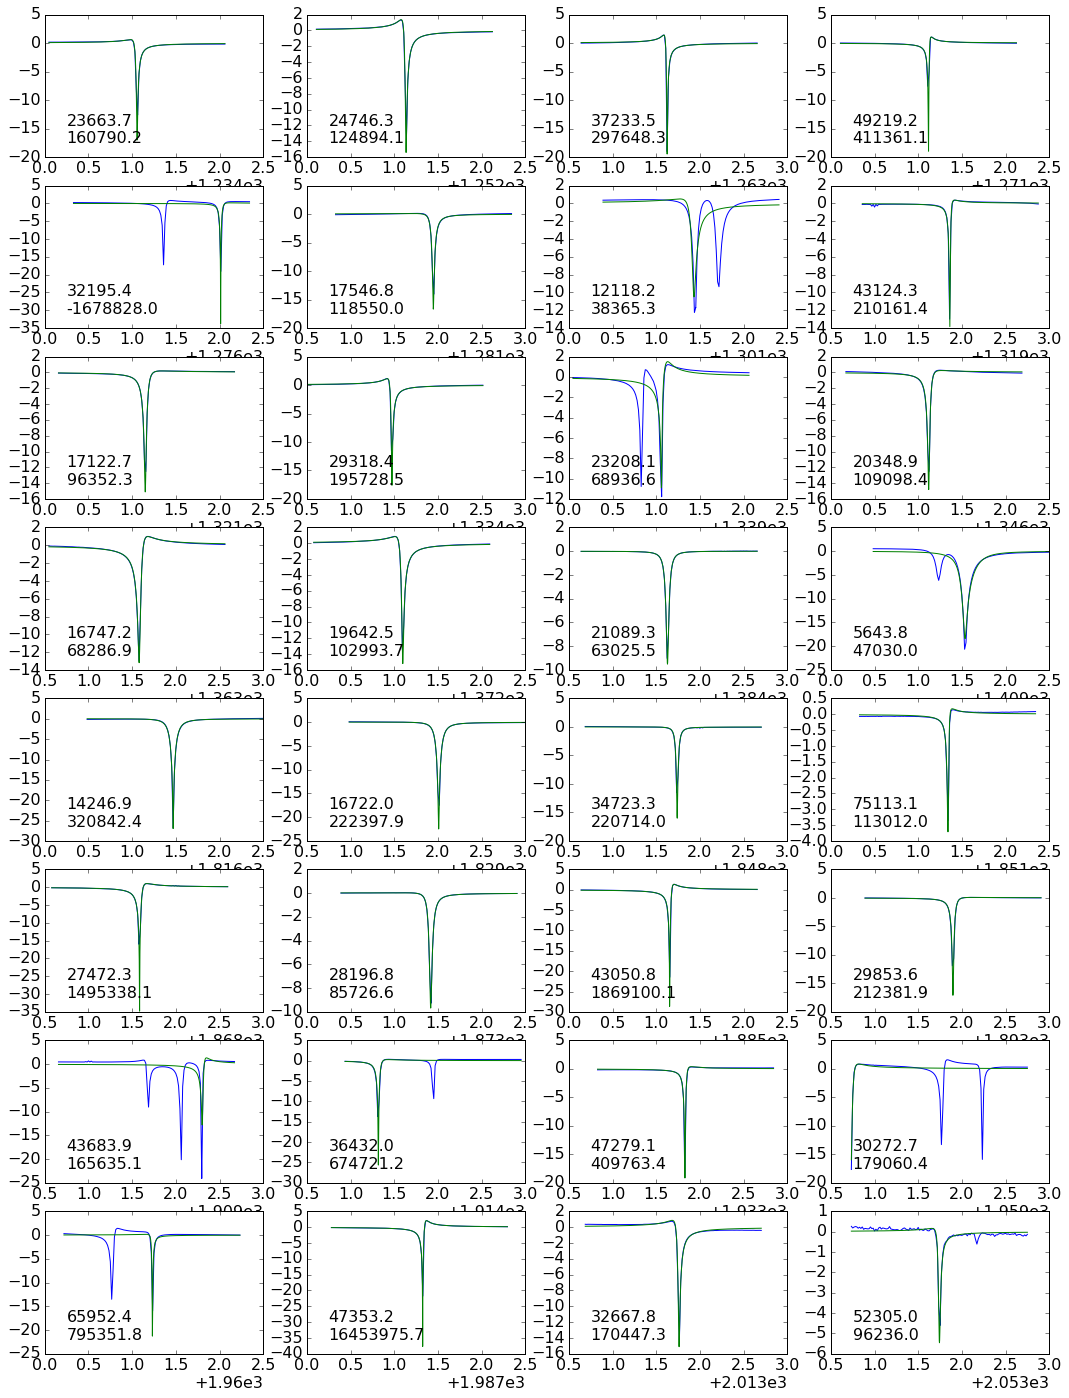

In [7]:
dd = df[(df.atten==14.0) & (df.timestream_modulation_duty_cycle==1.0)]
fig,axs = subplots(8,4,figsize=(18,24))
for k in range(32):
    ax = axs.flatten()[k]
    for row in [dd.iloc[k]]:
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_normalized_s21)))
        ax.plot(row.sweep_model_freqs_MHz,20*np.log10(np.abs(row.sweep_model_normalized_s21)))
    ax.text(0.1,0.1,('%.1f\n%.1f' % (row.Q,row.Q_i)),transform=ax.transAxes)

1.41025959459 1235.04633134 148049.154676 nan 0.129345756718
1.13870200341 1235.04493417 140910.494113 nan 0.127382671376
1.3348567257 1235.04463953 140515.90674 nan 0.125901094344
1.7771234267 1235.04625625 140738.765388 nan 0.169228103684
3.20820088561 1235.0452531 134341.965787 nan 0.182565978291
4.59022831611 1235.04352523 125475.774898 nan 0.197754586281
6.64683039286 1235.03775333 103659.437109 nan 0.253478181207
1.21843786979 1235.04683414 145845.847407 nan 0.162482696158
4.0200091381 1235.0446363 131627.71171 nan 0.189348325167
1.33314392772 1235.04646101 142772.033916 nan 0.169274070749
1.44695734045 1235.04641406 138702.168288 nan 0.197978505424
1.79694291707 1235.04315545 118887.132393 nan 0.260752018966
1.96472286555 1235.0391817 105512.732663 nan 0.28013643056
2.5430881499 1235.03106061 87823.2714774 nan 0.294184314188
2.87489954759 1235.01834898 70901.9679073 nan 0.311198918912
3.0485008214 1234.99992514 56379.0833085 nan 0.327797836391
3.22606245458 1234.97345276 44128.7

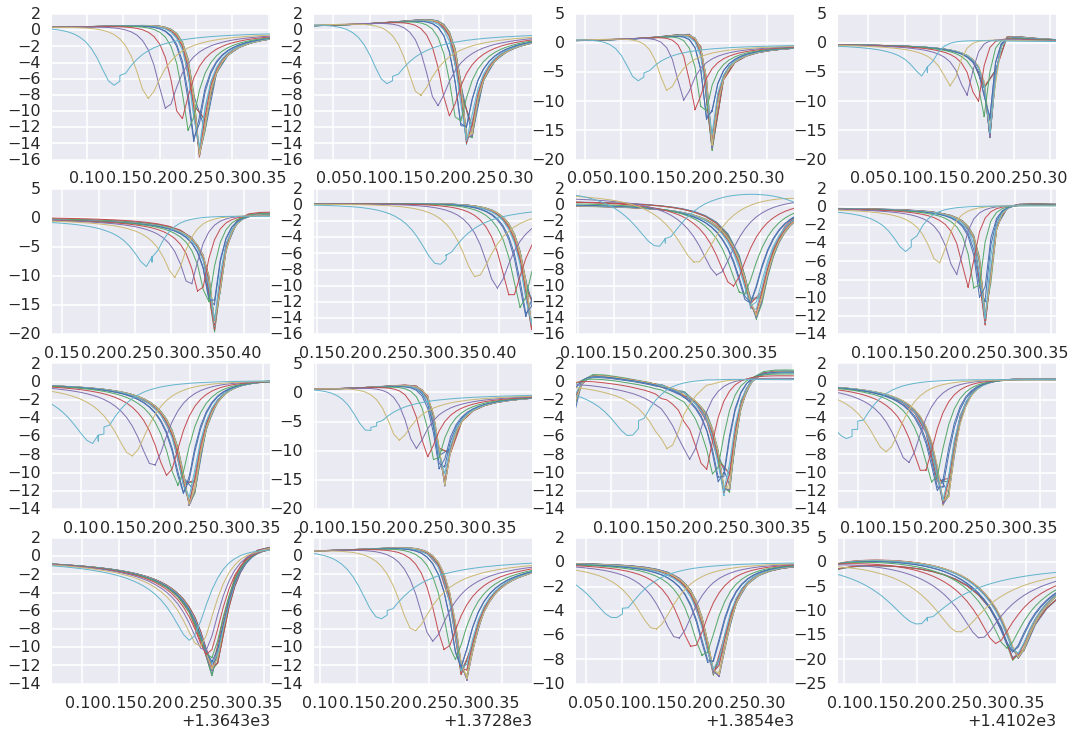

In [31]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1700)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21/row.A_mag)))
        if k==0:
            print row.sweep_primary_load_temperature,row.f_0,row.Q_i,row.a,row.sweep_primary_package_temperature
    ax.set_xlim(row.sweep_freqs_MHz.mean()-0.2,row.sweep_freqs_MHz.mean()+0.1)

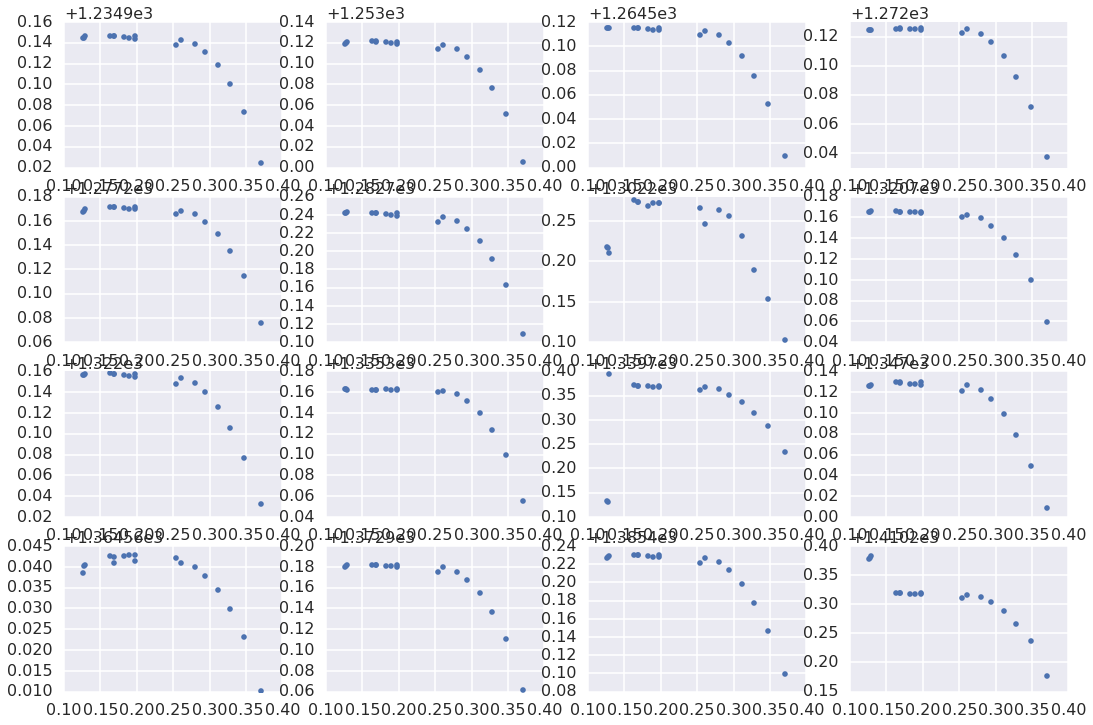

In [27]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 <1700)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    ax.plot(res.sweep_primary_package_temperature,res.f_0,'.')
#    ax.plot(res.sweep_primary_package_temperature,1e6/res.Q_i,'.')


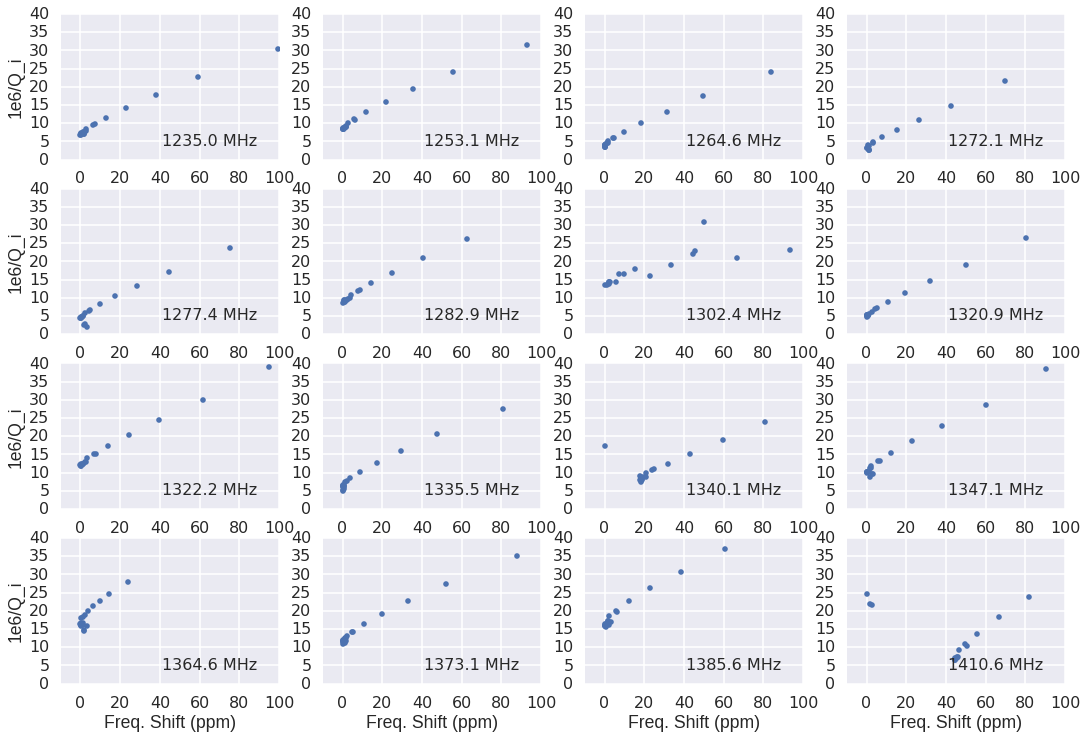

In [70]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 <1700)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    x = 1-res.f_0/res.f_0.max()
    ax.plot(1e6*x,1e6/res.Q_i,'.')
    ax.set_xlim(-10,100)
    ax.set_ylim(0,40)
    ax.text(0.9,0.1,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
#    ax.plot(res.sweep_primary_package_temperature,1e6/res.Q_i,'.')
for k in range(4):
    axs[-1,k].set_xlabel('Freq. Shift (ppm)')
    axs[k,0].set_ylabel('1e6/Q_i')

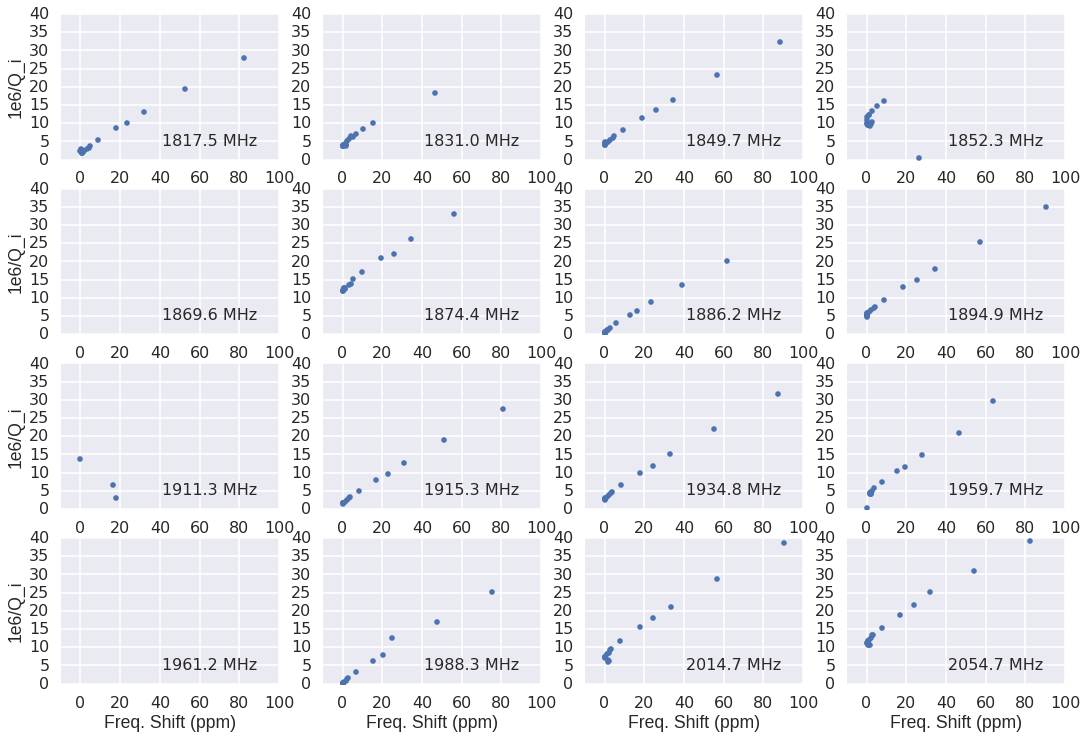

In [71]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 >1700)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    x = 1-res.f_0/res.f_0.max()
    ax.plot(1e6*x,1e6/res.Q_i,'.')
    ax.set_xlim(-10,100)
    ax.set_ylim(0,40)
    ax.text(0.9,0.1,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
#    ax.plot(res.sweep_primary_package_temperature,1e6/res.Q_i,'.')
for k in range(4):
    axs[-1,k].set_xlabel('Freq. Shift (ppm)')
    axs[k,0].set_ylabel('1e6/Q_i')

1.42688614329 1817.46734436 422742.225396 nan 0.130569364214
1.15801556074 1817.46655648 334300.927252 nan 0.122933676178
1.37367505889 1817.46639685 364077.230339 nan 0.12846682749
1.78767891264 1817.46581307 550155.46728 nan 0.169046371482
3.20732205645 1817.46386961 428087.557534 nan 0.183892396193
4.54962200151 1817.45994703 304570.242875 nan 0.214983543383
6.59007450833 1817.42432294 98326.5403591 nan 0.295149872688
1.24640295692 1817.46590796 522548.261428 nan 0.16109967501
4.03302573343 1817.46165732 334001.042814 nan 0.190991736606
1.36591127665 1817.46577679 552472.939917 nan 0.16850451162
1.4827074258 1817.46539777 484078.641296 nan 0.198183098325
1.84213807346 1817.45882393 260228.480165 nan 0.260801206594
2.01551998932 1817.45098815 183294.533372 nan 0.280152147918
2.59373081552 1817.43475552 116915.246528 nan 0.293873132547
2.91955309548 1817.40920266 76325.7977794 nan 0.311428172624
3.09418184422 1817.37189548 51624.67917 nan 0.328216961354
3.25844244874 1817.31760935 359

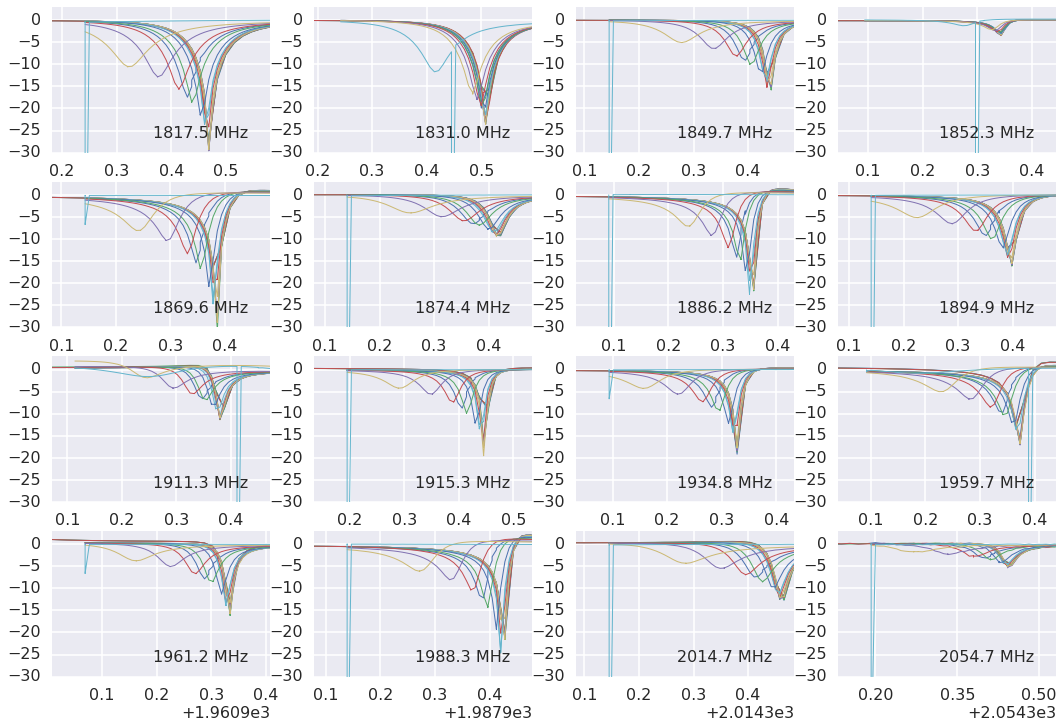

In [64]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 > 1700)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21/row.A_mag)))
        if k==0:
            print row.sweep_primary_load_temperature,row.f_0,row.Q_i,row.a,row.sweep_primary_package_temperature
    ax.set_xlim(row.sweep_freqs_MHz.mean()-0.3,row.sweep_freqs_MHz.mean()+0.1)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.text(0.9,0.1,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    ax.set_ylim(-30,3)

1.41025959459 1235.04633134 148049.154676 nan 0.129345756718
1.13870200341 1235.04493417 140910.494113 nan 0.127382671376
1.3348567257 1235.04463953 140515.90674 nan 0.125901094344
1.7771234267 1235.04625625 140738.765388 nan 0.169228103684
3.20820088561 1235.0452531 134341.965787 nan 0.182565978291
4.59022831611 1235.04352523 125475.774898 nan 0.197754586281
6.64683039286 1235.03775333 103659.437109 nan 0.253478181207
1.21843786979 1235.04683414 145845.847407 nan 0.162482696158
4.0200091381 1235.0446363 131627.71171 nan 0.189348325167
1.33314392772 1235.04646101 142772.033916 nan 0.169274070749
1.44695734045 1235.04641406 138702.168288 nan 0.197978505424
1.79694291707 1235.04315545 118887.132393 nan 0.260752018966
1.96472286555 1235.0391817 105512.732663 nan 0.28013643056
2.5430881499 1235.03106061 87823.2714774 nan 0.294184314188
2.87489954759 1235.01834898 70901.9679073 nan 0.311198918912
3.0485008214 1234.99992514 56379.0833085 nan 0.327797836391
3.22606245458 1234.97345276 44128.7

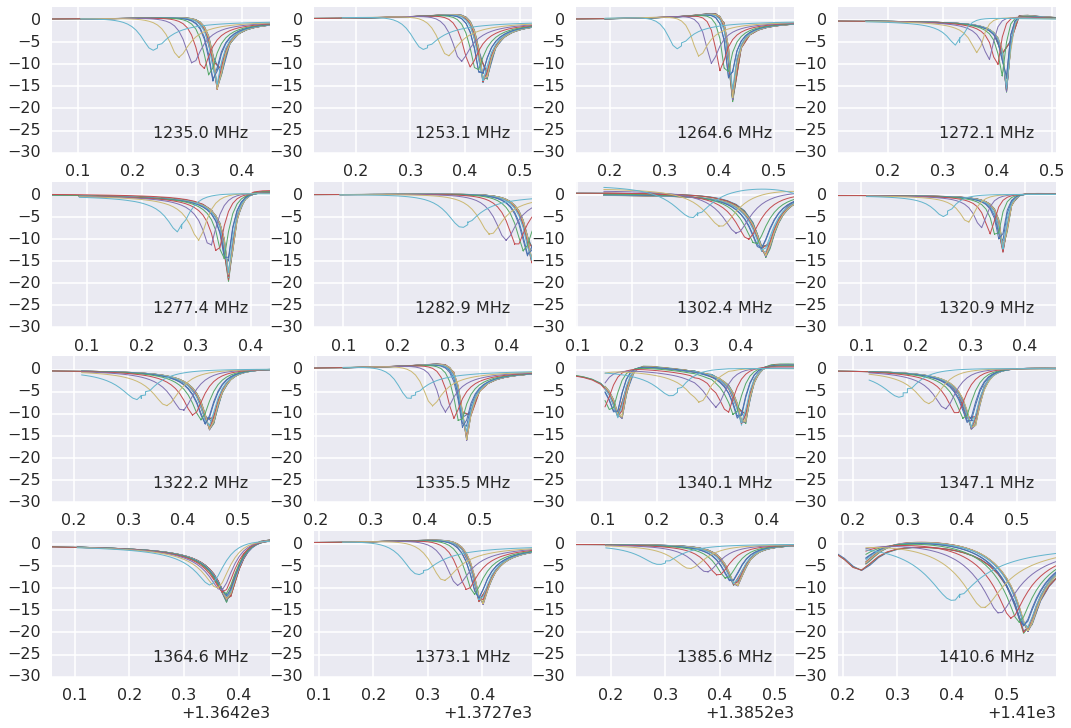

In [65]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1700)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21/row.A_mag)))
        if k==0:
            print row.sweep_primary_load_temperature,row.f_0,row.Q_i,row.a,row.sweep_primary_package_temperature
    ax.set_xlim(row.sweep_freqs_MHz.mean()-0.3,row.sweep_freqs_MHz.mean()+0.1)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.text(0.9,0.1,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    ax.set_ylim(-30,3)

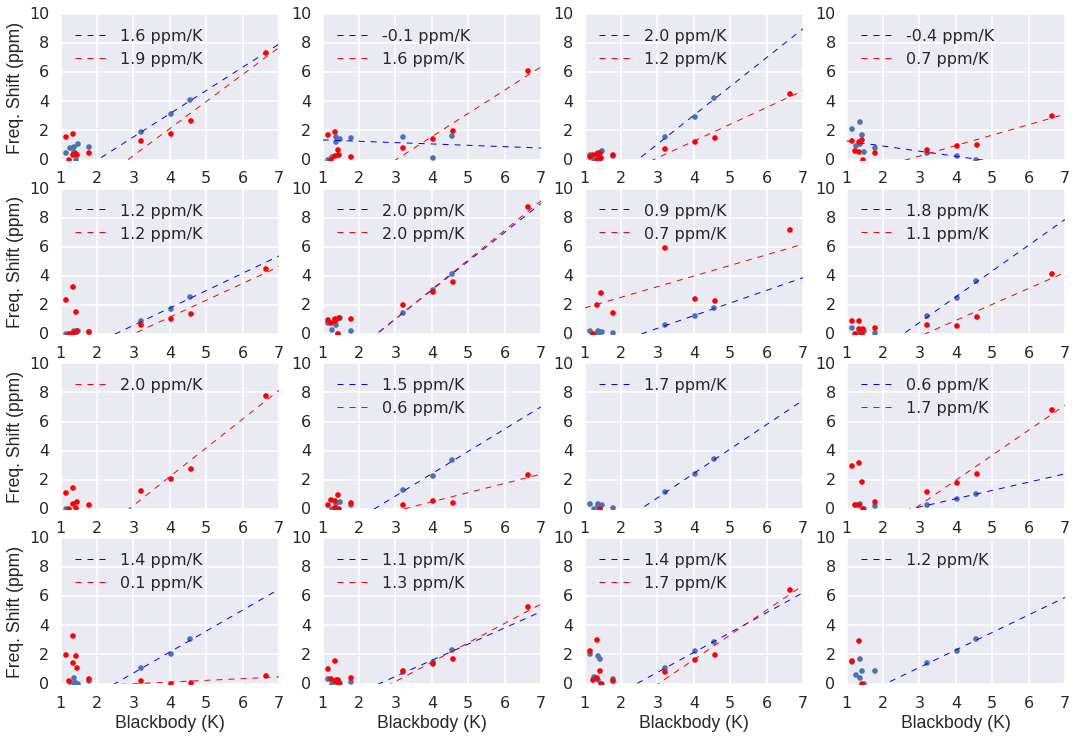

In [46]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 > 1700) & (df.sweep_primary_package_temperature < 0.26)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    Tbb = res.sweep_primary_load_temperature
    xppm = 1e6*(1-res.f_0/res.f_0.max())
    ax.plot(Tbb,xppm,'.',label='')
    mask = (Tbb > 3) & (xppm < 10)
    if mask.sum():
        pp = np.polyfit(Tbb[mask],xppm[mask],1)
        T = np.linspace(1,7,10)
        ax.plot(T,np.polyval(pp,T),'b--',label=('%.1f ppm/K' % pp[0]))

    ax.set_ylim(0,10)
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1700) & (df.sweep_primary_package_temperature < 0.26)]
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    Tbb = res.sweep_primary_load_temperature
    xppm = 1e6*(1-res.f_0/res.f_0.max())
    ax.plot(Tbb,xppm,'r.',label='')
    mask = (Tbb > 3) & (xppm < 10)
    if mask.sum():
        pp = np.polyfit(Tbb[mask],xppm[mask],1)
        T = np.linspace(1,7,10)
        ax.plot(T,np.polyval(pp,T),'r--',label=('%.1f ppm/K' % pp[0]))
    ax.legend(loc='upper left')

for k in range(4):
    axs[-1,k].set_xlabel('Blackbody (K)')
    axs[k,0].set_ylabel('Freq. Shift (ppm)')

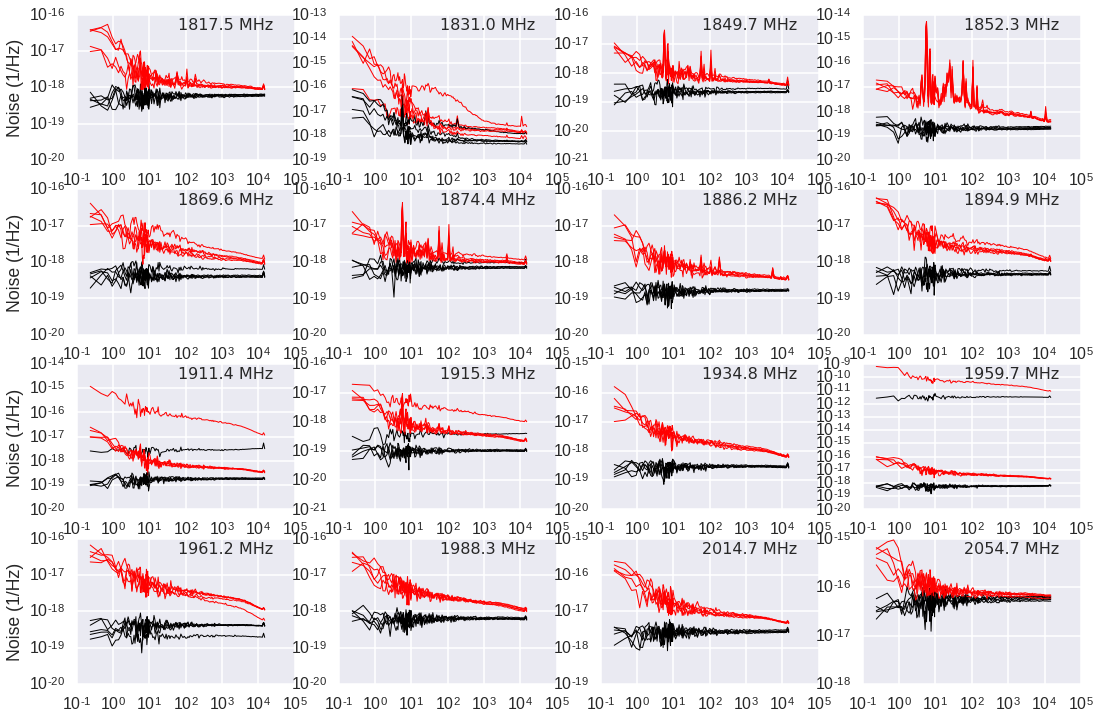

In [56]:
dd = df[(df.atten==2.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 > 1700) & (df.sweep_primary_package_temperature<.2) &
       (df.sweep_primary_load_temperature<2)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:],'r')
        ax.loglog(row.pca_freq,row.pca_eigvals[0,:],'k')
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    
for k in range(4):
    axs[k,0].set_ylabel('Noise (1/Hz)')

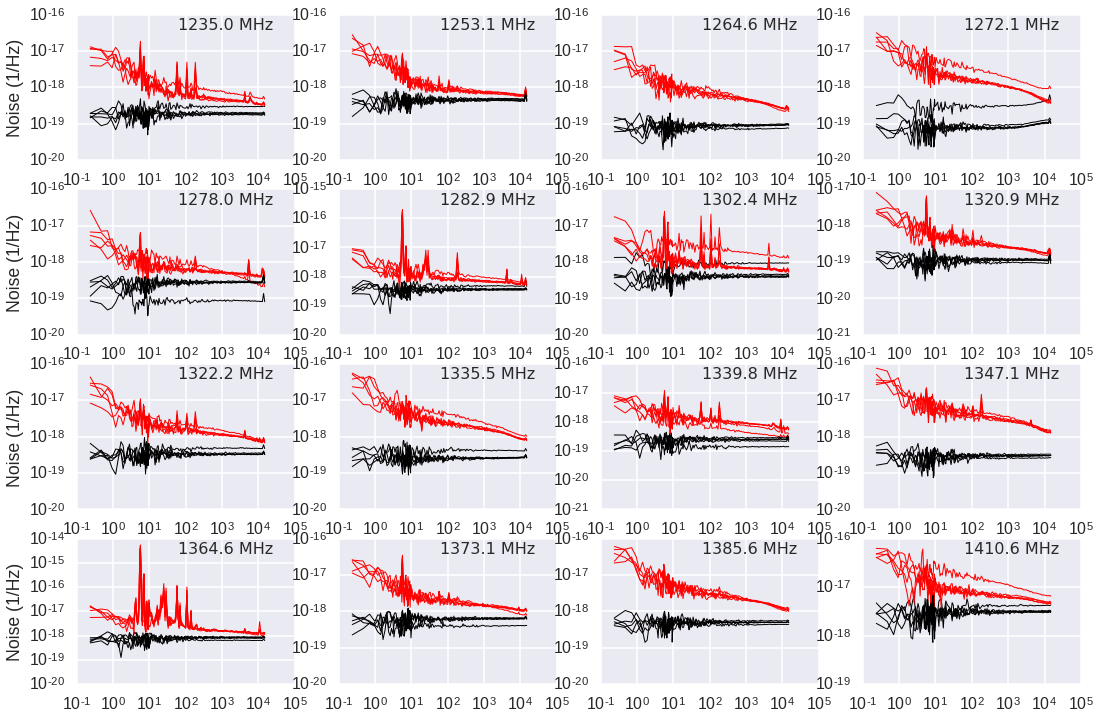

In [57]:
dd = df[(df.atten==2.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1700) & (df.sweep_primary_package_temperature<.2) &
       (df.sweep_primary_load_temperature<2)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:],'r')
        ax.loglog(row.pca_freq,row.pca_eigvals[0,:],'k')
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    
for k in range(4):
    axs[k,0].set_ylabel('Noise (1/Hz)')

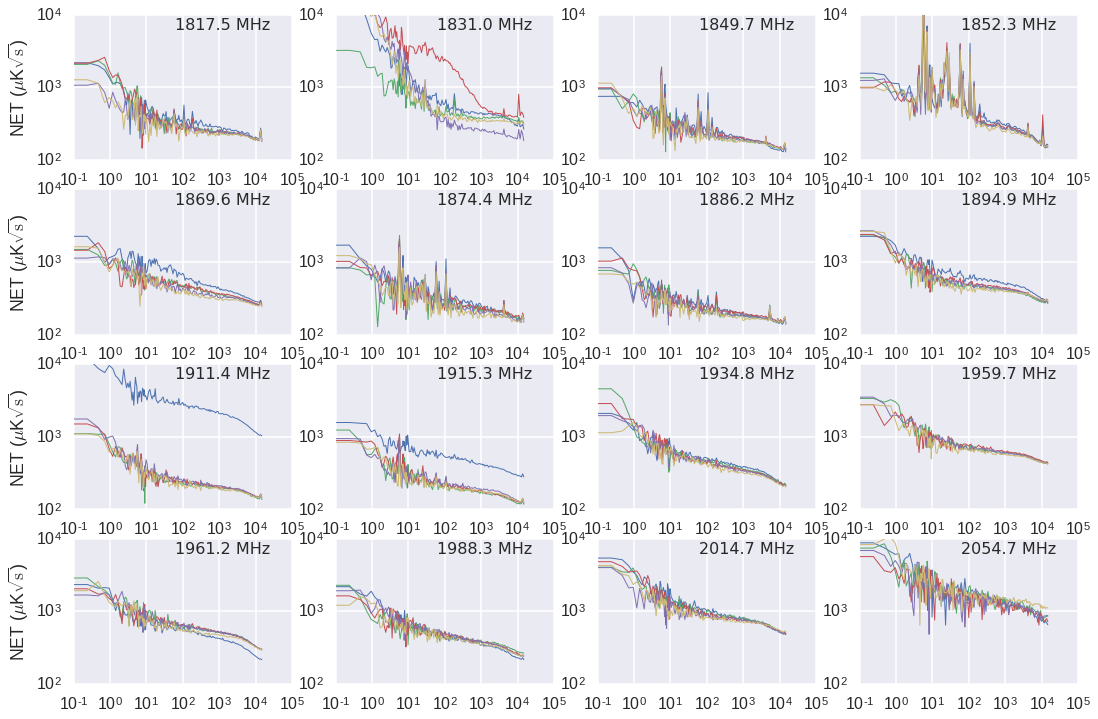

In [58]:
dd = df[(df.atten==2.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 > 1700) & (df.sweep_primary_package_temperature<.2) &
       (df.sweep_primary_load_temperature<2)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        per_rt_hz = np.sqrt(row.pca_eigvals[1,:]-row.pca_eigvals[0,:])
        net = per_rt_hz/(2e-6)/np.sqrt(2) # 2ppm/K
        ax.loglog(row.pca_freq,net*1e6)
#        ax.loglog(row.pca_freq,row.pca_eigvals[0,:])
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    ax.set_ylim(100,1e4)
    ax.set_xscale('log')
        
for k in range(4):
    axs[k,0].set_ylabel('NET ($\mu$K$\sqrt{\mathrm{s}}$)')

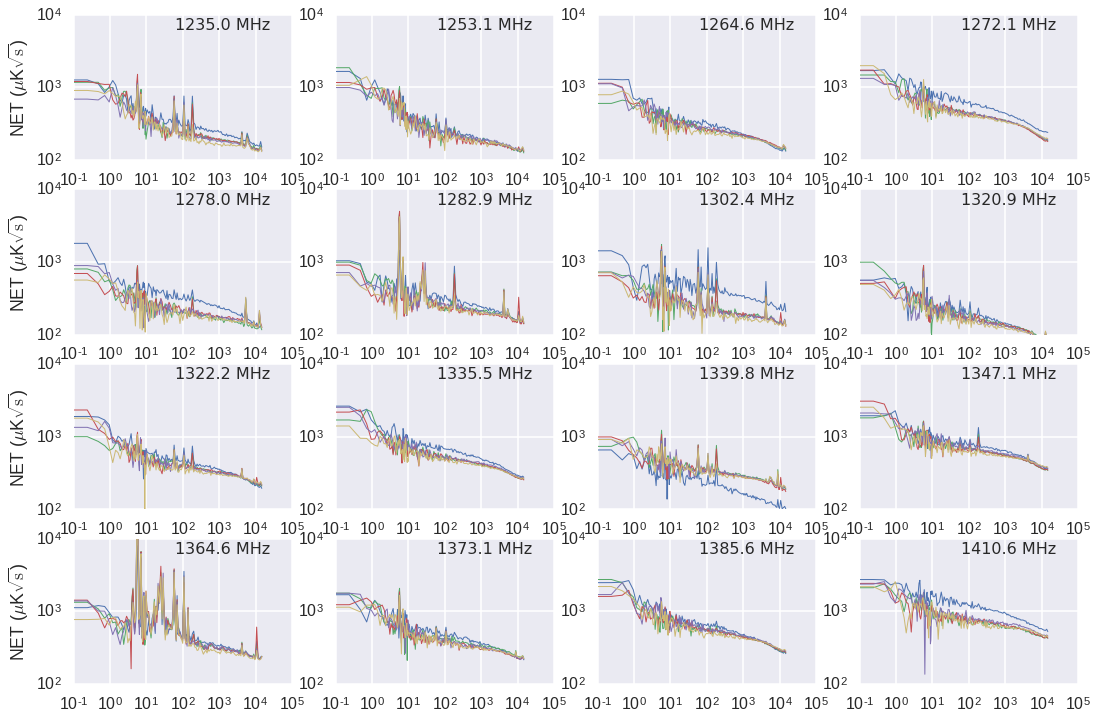

In [59]:
dd = df[(df.atten==2.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1700) & (df.sweep_primary_package_temperature<.2) &
       (df.sweep_primary_load_temperature<2)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        per_rt_hz = np.sqrt(row.pca_eigvals[1,:]-row.pca_eigvals[0,:])
        net = per_rt_hz/(2e-6)/np.sqrt(2) # 2ppm/K
        ax.loglog(row.pca_freq,net*1e6)
#        ax.loglog(row.pca_freq,row.pca_eigvals[0,:])
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    ax.set_ylim(100,1e4)
    ax.set_xscale('log')
        
for k in range(4):
    axs[k,0].set_ylabel('NET ($\mu$K$\sqrt{\mathrm{s}}$)')

In [39]:
pp

array([ 1.20166732, -2.49382002])

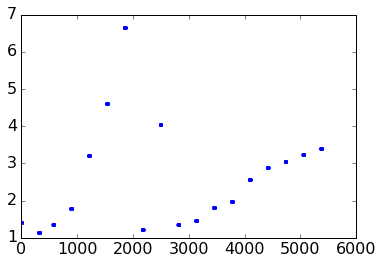

In [12]:
plot(dd.sweep_primary_load_temperature,'.')

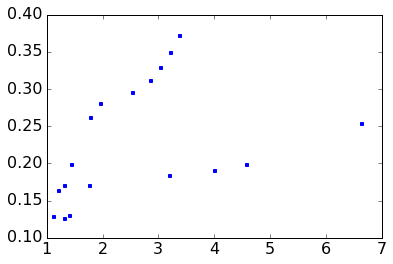

In [13]:
plot(dd.sweep_primary_load_temperature,dd.sweep_primary_package_temperature,'.')

In [14]:
dd.shape

(288, 92)

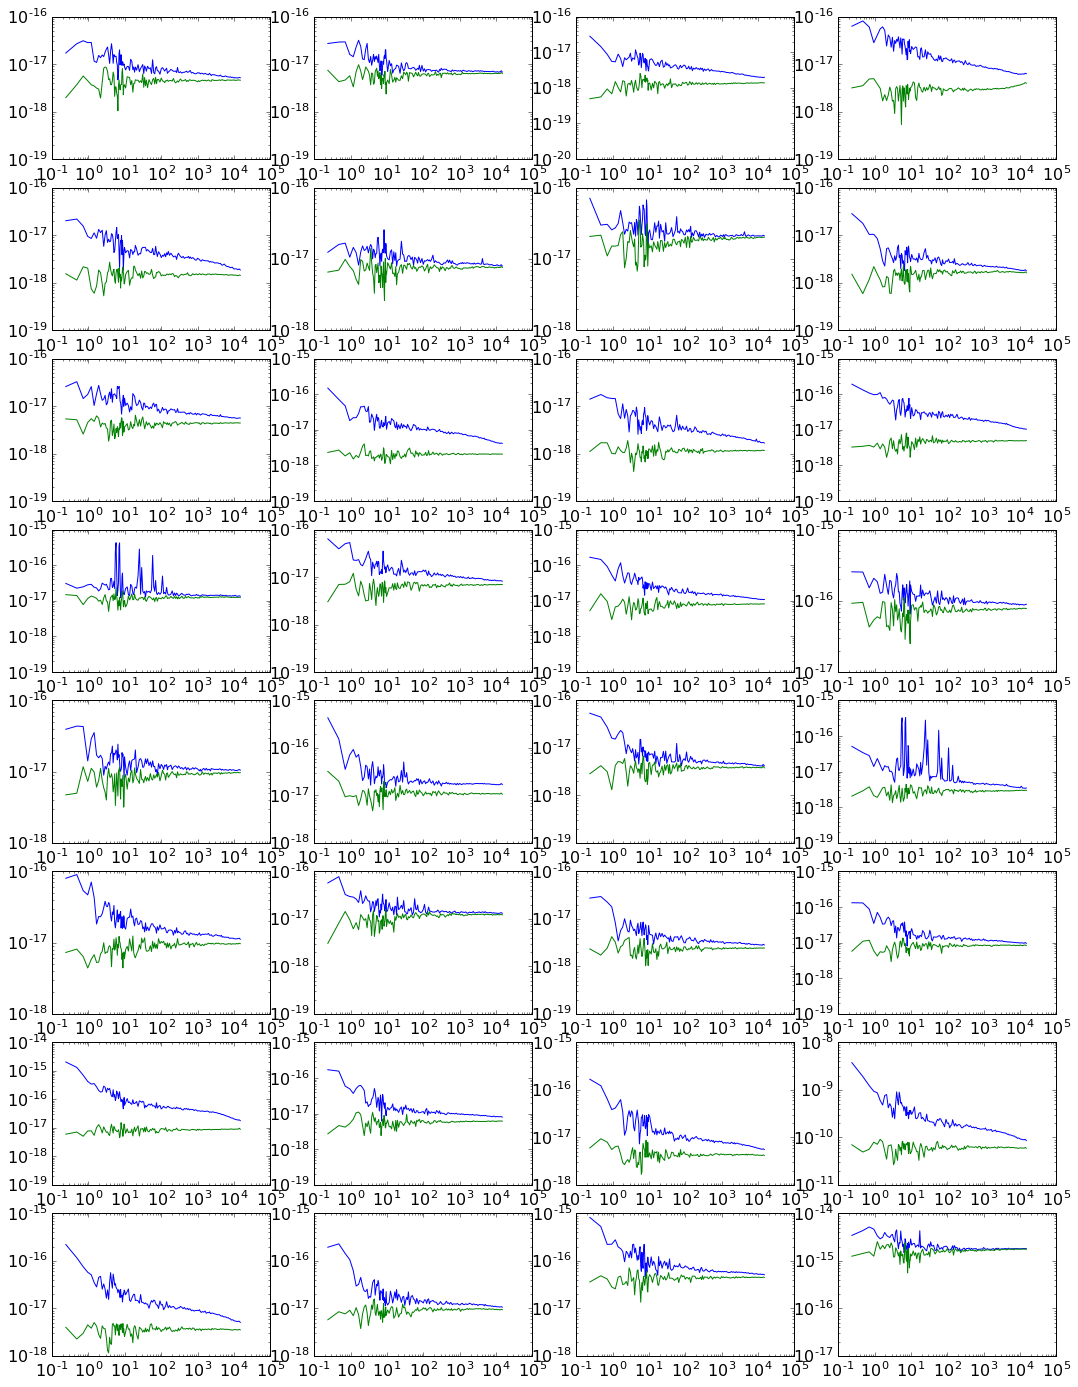

In [15]:
dd = df[(df.atten==14.0) & (df.timestream_modulation_duty_cycle==1.0)]
fig,axs = subplots(8,4,figsize=(18,24))
for k in range(32):
    ax = axs.flatten()[k]
    for row in [dd.iloc[k]]:
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:])
        ax.loglog(row.pca_freq,row.pca_eigvals[0,:])

In [16]:
1e-9/2e-6

0.0005

In [17]:
500/np.sqrt(2)

353.55339059327372

In [18]:
1/(2*np.pi*5e3)

3.183098861837907e-05

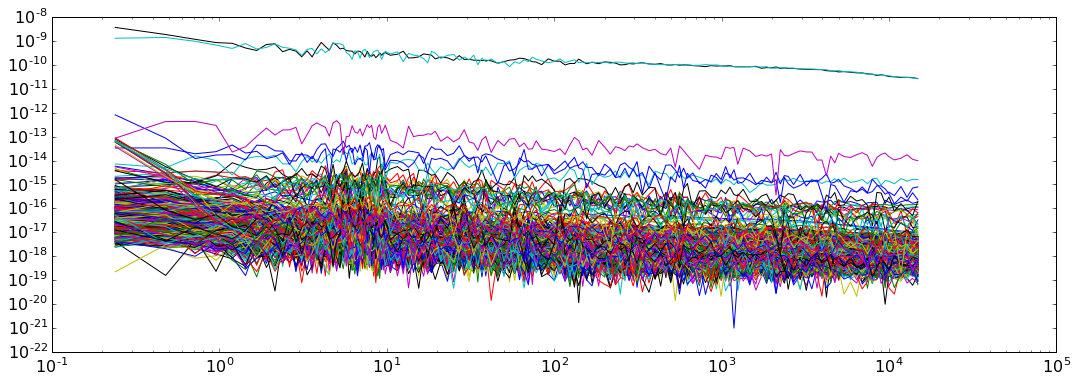

In [19]:
figure(figsize=(18,6))
for k,row in dd.iterrows():
    loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:])

In [20]:
dd.shape

(544, 92)

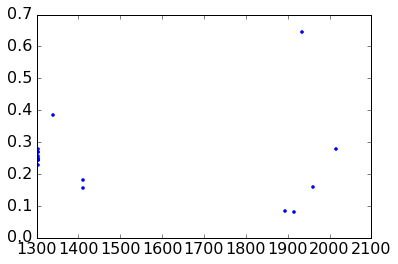

In [21]:
plot(dd.f_0,dd.a,'.')

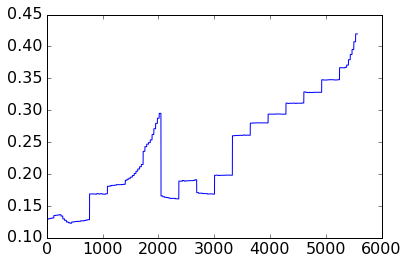

In [22]:
plot(df.sweep_primary_package_temperature)

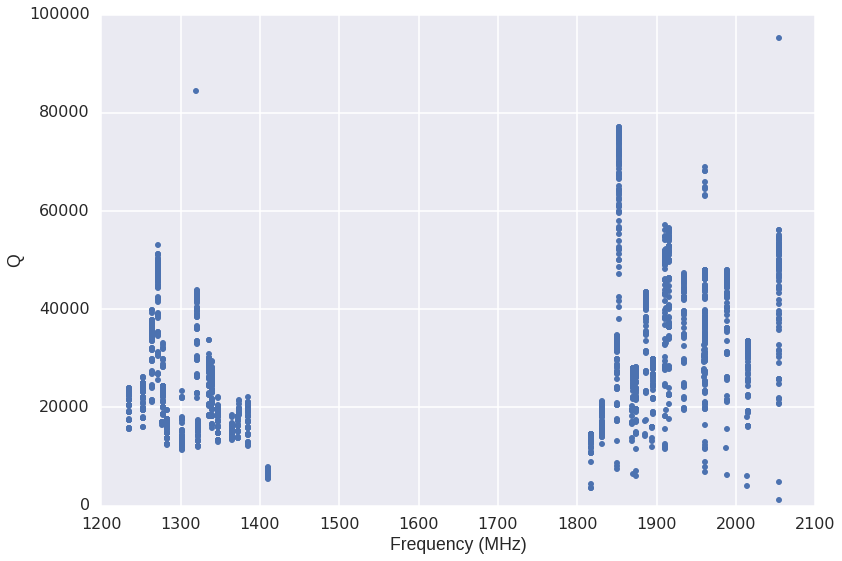

In [76]:
plot(df.f_0,df.Q,'.')
ylim(0,1e5)
xlabel('Frequency (MHz)')
ylabel('Q')